In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
datadir="/cellar/users/snwright/Data/RareCommon/"

In [7]:
pilot = pd.read_csv(datadir+"pilot_netcoloc_results_combined.txt", sep="\t")
overlap = pd.read_csv(datadir + "pilot_overlap_results.txt", sep="\t")

In [8]:
traits = {"30630":"Apolipoprotein A", "30640":"Apolipoprotein B", "23110":"Impedance of Arm", "30830":"SHBG", "30840":"Total bilirubin", 
            "30050": "Mean corpuscular haemoglobin", "30140":"Neutrophil count", "30250": "Reticulocyte count", "30880":"Urate",
            30630:"Apolipoprotein A", 30640:"Apolipoprotein B", 23110:"Impedance of Arm", 30830:"SHBG", 30840:"Total bilirubin", 
            30050: "Mean corpuscular haemoglobin", 30140:"Neutrophil count", 30250: "Reticulocyte count", 30880:"Urate"}

pilot = pilot.replace(traits)
overlap = overlap.replace(traits)
overlap = overlap.set_index("Trait")
overlap.index.name=None

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [10]:
overlap.describe()

,Trait,Common,Rare,Overlap,Overlap_p
count,9.000000,9.00000,9.000000,9.000000,9.000000e+00
mean,29707.777778,1247.00000,27.333333,14.888889,2.033162e-04
std,2494.081884,414.11502,12.549900,8.506533,4.164147e-04
min,23110.000000,596.00000,18.000000,5.000000,1.676817e-19
25%,30140.000000,1078.00000,19.000000,9.000000,4.062146e-18
50%,30630.000000,1269.00000,23.000000,14.000000,5.971442e-15
75%,30830.000000,1377.00000,29.000000,17.000000,4.981502e-08
max,30880.000000,1976.00000,57.000000,32.000000,1.121259e-03


In [ ]:
pilot = pilot[pilot["Trait_Common"] != "Trait_Common"]
pilot["Mean_NPS"] = pilot["Mean_NPS"].astype(float)
pilot["p_NPS"] = pilot["p_NPS"].astype(float)
pilot["p_Size"] = pilot["p_Size"].astype(float)

In [7]:
pilot["OE"] = pilot["Size"].astype(float) / pilot["Null_Size"].astype(float)

In [37]:
pilot.Trait_Common.unique()

array(['Apolipoprotein A', 'Apolipoprotein B', 'SHBG', 'Total bilirubin',
       'Urate', 'Impedance of Arm', 'Mean corpuscular haemoglobin',
       'Neutrophil count', 'Reticulocyte count'], dtype=object)

In [8]:
pilot["anno"] = pilot.p_Size.apply(lambda x: "***" if x < 0.0000001 else "**" if x < 0.00001 else "*" if x < 0.001 else "")

In [150]:
pilot.anno.value_counts()

       38
***    28
*       6
**      3
Name: anno, dtype: int64

In [9]:
p_size = pilot.pivot(index="Trait_Common", columns="Trait_Rare", values="p_Size")
ratio = pilot.pivot(index="Trait_Common", columns="Trait_Rare", values="OE")
anno = pilot.pivot(index="Trait_Common", columns="Trait_Rare", values="anno")


#a = a.fillna(1)

In [10]:
order = ['Apolipoprotein A', 'Apolipoprotein B', 'SHBG', 'Total bilirubin',
       'Urate','Reticulocyte count', 'Neutrophil count','Mean corpuscular haemoglobin',
        'Impedance of Arm']
overlap.head()
p_size = p_size.loc[order, order]
ratio = ratio.loc[order, order]
anno = anno.loc[order, order]

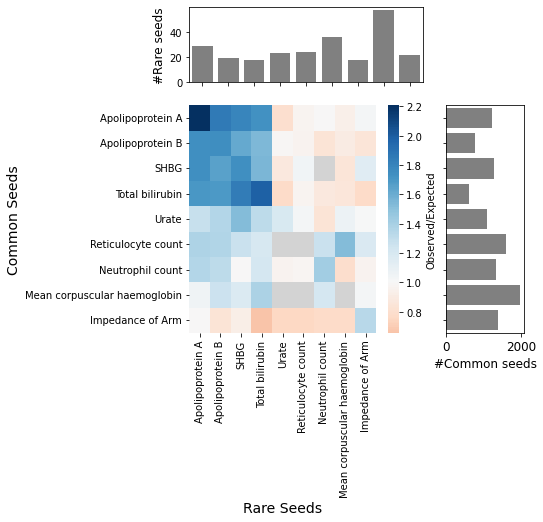

In [170]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,6), gridspec_kw={"width_ratios":[3,1], "height_ratios":[1,3], "wspace":0.15, "hspace":0.15})
overlap=overlap.loc[order]
a = a.loc[order, order]
#overlap.loc[:, "Common"].plot.barh( ax=axs[1][1])
axs[0][0].bar(x=overlap.index, height=overlap["Rare"], color="grey")
axs[0][0].set_xlim(-0.5, 8.5)
axs[0][0].set_xticklabels([])
axs[0][0].set_ylabel("#Rare seeds", fontsize=12)
overlap=overlap.loc[order[::-1]]
axs[1][1].barh(y=overlap.index, width=overlap["Common"], color="grey")
axs[1][1].set_ylim(-0.5, 8.5)
axs[1][1].set_yticklabels([])
axs[1][1].set_xlabel("#Common seeds", fontsize=12)
#overlap.loc[:, "Rare"].plot.bar( ax=axs[0])
g = sns.heatmap(a, cmap='RdBu', center=1, cbar_kws={'label':"Observed/Expected", "location":"right"}, square=False, ax=axs[1][0])
g.set_facecolor("lightgrey")
axs[1][0].set_xlabel("Rare Seeds", fontsize=14)
axs[1][0].set_ylabel("Common Seeds", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
axs[0][1].axis('off')
plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/pilot_rare_common_bars.png", bbox_inches="tight", dpi=400)


(0.0, 1.0, 0.0, 1.0)

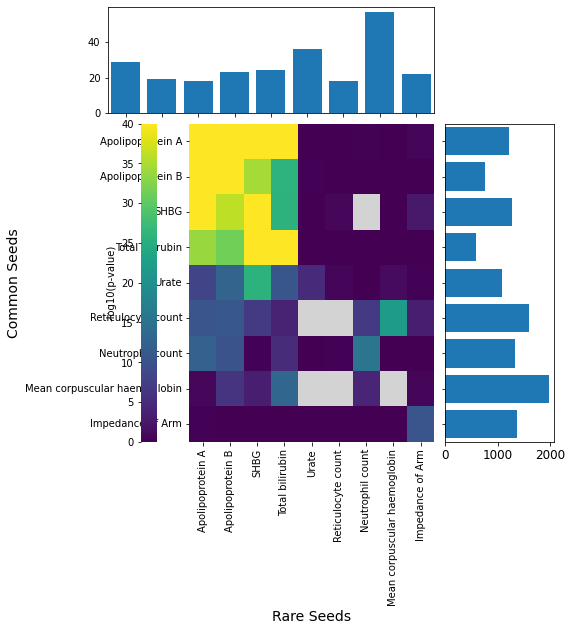

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8), gridspec_kw={"width_ratios":[3,1], "height_ratios":[1,3], "wspace":0.05, "hspace":0.05})
overlap=overlap.loc[order]
a = a.loc[order, order]
#overlap.loc[:, "Common"].plot.barh( ax=axs[1][1])
axs[0][0].bar(x=overlap.index, height=overlap["Rare"])
axs[0][0].set_xlim(-0.5, 8.5)
axs[0][0].set_xticklabels([])
overlap=overlap.loc[order[::-1]]
axs[1][1].barh(y=overlap.index, width=overlap["Common"])
axs[1][1].set_ylim(-0.5, 8.5)
axs[1][1].set_yticklabels([])
#overlap.loc[:, "Rare"].plot.bar( ax=axs[0])
g = sns.heatmap(-1 * np.log10(a), vmax=40, cmap='viridis', cbar_kws={'label':"-log10(p-value)", "location":"left"}, square=False, ax=axs[1][0])
g.set_facecolor("lightgrey")
axs[1][0].set_xlabel("Rare Seeds", fontsize=14)
axs[1][0].set_ylabel("Common Seeds", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
axs[0][1].axis('off')
#plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/pilot_p_size_heatmap.png", bbox_inches="tight", dpi=400)


In [11]:
overlap_mat = pd.read_csv(datadir+"pilot_overlap_results_matrix.txt", sep="\t")
overlap_mat = overlap_mat.replace(traits)

In [12]:
overlap_nums = overlap_mat.pivot("TraitC", "TraitR", "Overlap")
overlap_nums = overlap_nums.loc[order, order]

In [13]:
overlap_p = overlap_mat.pivot("TraitC", "TraitR", "Overlap_p")
overlap_p = overlap_p.loc[order, order]

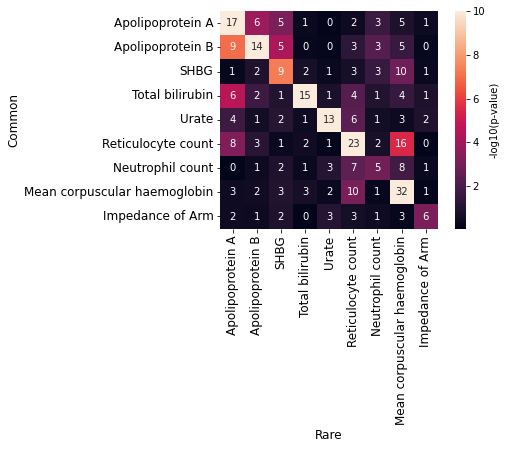

In [165]:
sns.heatmap(-1* np.log10(overlap_p), annot=overlap_nums, vmax =10, cbar_kws={'label':"-log10(p-value)"}, square=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Common", fontsize=12)
plt.xlabel("Rare", fontsize=12)
plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/pilot_hyperOverlap_heatmap.png", bbox_inches = "tight", dpi=400)

In [143]:
ratio_sig = p_size < 0.01

In [144]:
ratio_sig

Trait_Rare,Apolipoprotein A,Apolipoprotein B,SHBG,Total bilirubin,Urate,Reticulocyte count,Neutrophil count,Mean corpuscular haemoglobin,Impedance of Arm
Trait_Common,,,,,,,,,
Apolipoprotein A,True,True,True,True,False,False,False,False,False
Apolipoprotein B,True,True,True,True,False,False,False,False,False
SHBG,True,True,True,True,False,False,False,False,True
Total bilirubin,True,True,True,True,False,False,False,False,False
Urate,True,True,True,True,True,False,False,False,False
Reticulocyte count,True,True,True,True,False,False,True,True,True
Neutrophil count,True,True,False,True,False,False,True,False,False
Mean corpuscular haemoglobin,False,True,True,True,False,False,True,False,False
Impedance of Arm,False,False,False,False,False,False,False,False,True


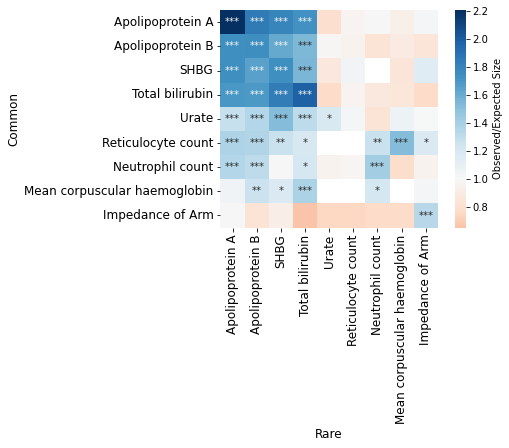

In [164]:
sns.heatmap(ratio,cmap='RdBu', cbar_kws={'label':"Observed/Expected Size"}, square=True, center=1, annot=anno.to_numpy(), fmt='s')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Common", fontsize=12)
plt.xlabel("Rare", fontsize=12)
plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/pilot_OE_heatmap.png", bbox_inches = "tight", dpi=400)

# Scope of rare variants

## Continuous traits

In [14]:
cont = pd.read_csv(datadir+"AZdata/Table17_pan_quant.txt", sep="\t")

In [15]:
def get_number_of_genes(data, th, phe_col, gene_col, p_col):
    data = data[data[p_col] < th]
    results = data.loc[:, (gene_col, phe_col)].drop_duplicates()
    pheno_counts = results.groupby(phe_col).count()
    gene_th = [i for i in range(1, 50)]
    traits_meeting_th = []
    for x in gene_th:
        traits_meeting_th.append( np.sum(pheno_counts >= x)[0])
    return traits_meeting_th


In [17]:
a = get_number_of_genes(cont, 0.0001, "pheno", "geno", "p")
b = get_number_of_genes(cont, 0.0000001, "pheno", "geno", "p")

test_th = [1e-3, 1e-4,5e-5, 1e-5, 2.5e-6, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

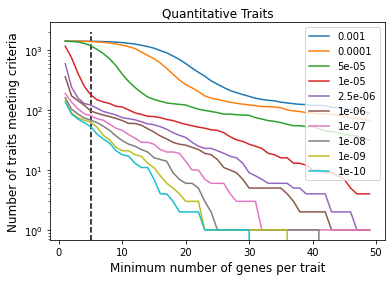

In [18]:
res = pd.DataFrame({t: get_number_of_genes(cont, t, "pheno", "geno", "p") for t in test_th}, index=[i for i in range(1, 50)])
res.plot()
plt.yscale("log")
plt.vlines(5, 0, 2000, linestyle="dashed", color="black")
plt.xlabel("Minimum number of genes per trait", fontsize=12)
plt.ylabel("Number of traits meeting criteria", fontsize=12)
plt.title("Quantitative Traits")
plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/quant_trait_count.png", bbox_inches="tight", dpi=400)

In [22]:
{t: get_number_of_genes(cont, t, "pheno", "geno", "p") for t in test_th}[2.5e-6]

[598,
 241,
 159,
 129,
 122,
 108,
 95,
 89,
 83,
 75,
 72,
 69,
 64,
 59,
 57,
 53,
 48,
 42,
 38,
 35,
 29,
 25,
 23,
 23,
 21,
 19,
 17,
 16,
 13,
 9,
 8,
 7,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 1,
 1,
 1]

In [179]:
np.sum(get_number_of_genes(cont, 0.00001, "pheno", "geno") > 50)

geno    3
dtype: int64

In [175]:
cont.head()

,geno,pheno,phenotype_dedup,Root,nSamples,nCases,nControls,p,beta,lower,upper,se,MedCases,MedControls,beta_eur,p.eur,model
0,CST3,30720,Cystatin C,Chapter III Diseases of the blood and blood-fo...,267750,118,267632,0.0,-3.354652,-3.516812,-3.192492,0.082736,-3.366538,0.000505,-3.375316,0.0,ptv
1,GPT,30620,Alanine aminotransferase,Chapter XI Diseases of the digestive system,267664,1842,265822,0.0,-1.319492,-1.362261,-1.276724,0.021821,-1.446579,0.005998,-1.317500,0.0,flexdmg
2,ALPL,30610,Alkaline phosphatase,Chapter XI Diseases of the digestive system,267769,2599,265170,0.0,-1.557665,-1.595021,-1.520308,0.019060,-1.757323,0.008825,-1.563213,0.0,flexdmg
3,CST3,30720,Cystatin C,Chapter III Diseases of the blood and blood-fo...,267750,222,267528,0.0,-2.408228,-2.526486,-2.289970,0.060337,-3.121020,0.000786,-2.432802,0.0,flexdmg
4,GOT1,30650,Aspartate aminotransferase,Chapter XI Diseases of the digestive system,266807,829,265978,0.0,-1.532285,-1.597299,-1.467272,0.033171,-1.727133,0.002586,-1.562553,0.0,flexdmg


# Binary traits

In [19]:
binary = pd.read_csv(datadir+"AZdata/Table16_pan_binary.txt", sep="\t")

In [203]:
binary.head()

,phenotype,genotype,EUR_pValue,AFR_pValue,EAS_pValue,SAS_pValue,cmh_pValue,cmh_odds_ratio,cmh_lci,cmh_uci,...,AFR_CaseQ,SAS_CtrlNQ,SAS_CtrlQ,SAS_CaseNQ,SAS_CaseQ,EAS_CtrlNQ,EAS_CtrlQ,EAS_CaseNQ,EAS_CaseQ,model
0,Union#D56#D56 Thalassaemia,HBB,7.610000e-93,1.0,0.1184,2.740000e-46,3.480000e-118,1186.281200,656.422534,2451.144895,...,0.0,4436.0,10.0,83.0,33.0,1445.0,7.0,22.0,1.0,ptv5pcnt
1,Source of report of D56 (thalassaemia),HBB,3.060000e-91,1.0,0.1110,4.350000e-42,6.660000e-112,1225.044263,655.130468,2474.924471,...,0.0,3437.0,11.0,74.0,32.0,1346.0,7.0,19.0,1.0,ptv5pcnt
2,20002#1427#polycystic kidney,PKD1,1.230000e-103,NaN,NaN,3.600000e-03,1.920000e-105,1641.099178,1050.256410,2915.302491,...,NaN,5551.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,ptv
3,20002#1427#polycystic kidney,PKD1,1.230000e-103,NaN,NaN,3.600000e-03,1.920000e-105,1641.099178,1050.256410,2915.302491,...,NaN,5551.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,ptv5pcnt
4,Source of report of Q61 (cystic kidney disease),PKD1,4.660000e-98,1.0,NaN,8.600000e-03,2.040000e-99,660.679392,410.647378,1077.061609,...,0.0,5569.0,3.0,11.0,1.0,NaN,NaN,NaN,NaN,ptv


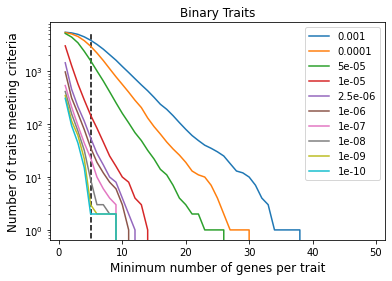

In [20]:
res = pd.DataFrame({t: get_number_of_genes(binary, t, "phenotype", "genotype", "EUR_pValue") for t in test_th}, index=[i for i in range(1, 50)])
res.plot()
plt.yscale("log")
plt.vlines(5, 0, 5000, linestyle="dashed", color="black")
plt.xlabel("Minimum number of genes per trait", fontsize=12)
plt.ylabel("Number of traits meeting criteria", fontsize=12)
plt.title("Binary Traits")
plt.savefig("/cellar/users/snwright/Data/Transfer/RVC/binary_trait_count.png", bbox_inches="tight", dpi=400)

In [23]:
{t: get_number_of_genes(binary, t, "phenotype", "genotype", "EUR_pValue") for t in test_th}[2.5e-6]

[1448,
 458,
 214,
 114,
 55,
 28,
 17,
 10,
 8,
 4,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [220]:
from scipy.stats import hypergeom

In [227]:
hypergeom(100, 50, 10).sf(0)

0.9994065803274137